In [75]:
import os
import sys
import numpy as np

sys.path.append('/nas/groups/iber/Users/Federico_Carrara/Statistics_Collection/EpiStats/src/statistics_collection')

import StatsAnalytics as sa
import StatsPlots as sp

In [2]:
os.getcwd()

'/nas/groups/iber/Users/Federico_Carrara/Statistics_Collection/EpiStats'

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


## 1. Load the tissue dataframes

In [47]:
# Load dataframes
out_root_path = '../outputs/'
df_files = [
    'output_bladder_control_curated_segmentation_s_10_e_6_d_8/cell_stats/stats_dataset_bladder.csv',
    'output_esophagus_Z2_curated_crop_s_10_e_6_d_8/cell_stats/stats_dataset_esophagus.csv',
    'output_intestine_sample2_b_curated_segmentation_relabel_seq_s_10_e_6_d_8/cell_stats/stats_dataset_intestine_villus.csv',
    'output_lung_new_sample_b_curated_segmentation_central_crop_relabel_seq_s_10_e_6_d_8/cell_stats/stats_dataset_lung_bronchiole.csv'
]
df_paths = [os.path.join(out_root_path, df_file) for df_file in df_files]

cell_stats_df = sa.prepare_df(paths_to_dfs=df_paths)
cell_stats_df

,cell_ID,tissue,tissue_type,file_name,mesh_dir,exclude_cell,area,volume,neighbors,neighbors_2D,area_2D,isoperimetric_ratio,num_neighbors,elongation,principal_axes,contact_area_fraction,contact_area_distribution,mean_contact_area,total_contact_area,num_neighbors_2D
0,1,bladder,stratified_transitional,./run_euler/outputs/output_bladder_control_cur...,./run_euler/outputs/output_bladder_control_cur...,False,1.076577,0.017199,[536 558],"[[536, 558]]",[0.0819],4218.218190,2,1.296384,[6.30024209e-10 5.40020764e-10 1.00000000e+00],1.000000,[1.07657712 1.07657712],1.076577,2.153154,[2]
1,2,bladder,stratified_transitional,./run_euler/outputs/output_bladder_control_cur...,./run_euler/outputs/output_bladder_control_cur...,True,NaN,NaN,[],"[[], [], [], [], [], [], [], [], [], [], [], [...","[63.3906, 63.3087, 63.3087, 62.244, 61.9164, 6...",NaN,0,NaN,NaN,NaN,[],NaN,0.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,3,bladder,stratified_transitional,./run_euler/outputs/output_bladder_control_cur...,./run_euler/outputs/output_bladder_control_cur...,True,NaN,NaN,[],"[[], [], [], [], [], [], [], [], [], [], [], [...","[142.7517, 141.9327, 141.9327, 139.8852, 138.5...",NaN,0,NaN,NaN,NaN,[],NaN,0.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,bladder,stratified_transitional,./run_euler/outputs/output_bladder_control_cur...,./run_euler/outputs/output_bladder_control_cur...,True,NaN,NaN,[],"[[], [], [], [], [], [], [], [], [], [], [], [...","[110.9745, 110.4012, 110.4012, 108.0261, 104.5...",NaN,0,NaN,NaN,NaN,[],NaN,0.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,bladder,stratified_transitional,./run_euler/outputs/output_bladder_control_cur...,./run_euler/outputs/output_bladder_control_cur...,False,1159.586833,2391.434955,[ 3 32 34 47 61 70 73 80 82 106 132 5...,"[[3, 561, 563], [3, 561, 563], [3, 561, 563], ...","[1.8018, 2.5389, 5.8149, 6.7977, 10.3194, 14.4...",272.641950,16,1.532248,[-0.61445824 -0.74901947 -0.24781225],1.000000,[144.67997845 51.55171865 214.864143 53.89...,103.785304,1660.564861,"[3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1264,176,lung_bronchiole,simple_cuboidal,./run_euler/outputs/output_lung_new_sample_b_c...,./run_euler/outputs/output_lung_new_sample_b_c...,False,445.255056,478.487852,[105 114 125 129 148 169 170 173],"[[125, 170], [125, 129, 170], [125, 129, 170],...","[0.8185937500000001, 2.1653125, 2.983906250000...",385.553588,8,1.270606,[-0.00389311 0.9183728 0.39569717],0.873589,[ 4.1394466 74.94009204 135.47485977 77.78...,62.304793,498.438341,"[2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."
1265,177,lung_bronchiole,simple_cuboidal,./run_euler/outputs/output_lung_new_sample_b_c...,./run_euler/outputs/output_lung_new_sample_b_c...,False,691.025208,1204.963398,[ 10 22 27 60 67 69 71 178 179],"[[22, 179], [22, 179], [22, 179], [22, 179], [...","[0.44890625000000006, 1.2675, 2.08609375000000...",227.265735,9,1.141860,[ 0.70097 -0.69764424 0.14809991],0.838381,[ 61.83304064 176.45099907 110.61104816 3.08...,79.950886,719.557975,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, ..."
1266,178,lung_bronchiole,simple_cuboidal,./run_euler/outputs/output_lung_new_sample_b_c...,./run_euler/outputs/output_lung_new_sample_b_c...,False,471.400474,574.256719,[ 10 12 22 27 60 61 67 69 177 180],"[[10, 177], [10, 177], [10, 177], [10, 177], [...","[0.07921875, 0.71296875, 1.61078125, 2.9046875...",317.656593,10,1.640184,[ 0.50206321 -0.79068915 -0.35034727],0.941212,[116.87856957 140.8240357 1.12069996 76.90...,57.898084,578.980842,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, ..."
1267,179,lung_bronchiole,simple_cuboidal,./run_euler/outputs/output_lung_new_sample_b_c...,./run_euler/outputs/output_lung_new_sample_b_c...,True,NaN,NaN,[],"[[], [], [], [], [], [], [], [], [], [], [], [...","[71.825, 73.48859375, 75.97078125, 78.61140625...",NaN,0,NaN,NaN,NaN,[],NaN,0.000000,"[0, 0, 0, 0, 0, 0, 0, 0, 0,

## 2. Process dataframe (outlier detection, numerical features extraction, standardization, ...)

In [48]:
# Rename columns
cell_stats_df = sa.rename_features(
    df=cell_stats_df,
    old_names=['area'],
    new_names=['surface_area']
)

In [49]:
# Outlier detection
cell_stats_df = sa.detect_outliers(df=cell_stats_df, quantile_level=0.025)

Found a total of 20 volume outliers in bladder sample,
of which:
    - Below lower bound: 10,
    - Above upper bound: 10. 
        
Found a total of 4 volume outliers in esophagus sample,
of which:
    - Below lower bound: 2,
    - Above upper bound: 2. 
        
Found a total of 12 volume outliers in intestine_villus sample,
of which:
    - Below lower bound: 6,
    - Above upper bound: 6. 
        
Found a total of 8 volume outliers in lung_bronchiole sample,
of which:
    - Below lower bound: 4,
    - Above upper bound: 4. 
        


In [51]:
# Extract dataframe with only ids and numerical features to make it more handy for plotting
# The function also remove NA's
numeric_cell_stats_df = sa.extract_numerical(
    df=cell_stats_df,
    numeric_features = [
        'surface_area', 'volume', 'isoperimetric_ratio', 
        'num_neighbors', 'elongation',
        'contact_area_fraction', 'mean_contact_area'
    ],
    remove_na = True
)

Dropped 438 records containing NAs.


In [52]:
# Get standardized dataset (only numerical features)
std_cell_stats_df = sa.standardize(
    df=numeric_cell_stats_df,
    numeric_features = [
        'surface_area', 'volume', 'isoperimetric_ratio', 
        'num_neighbors', 'elongation',
        'contact_area_fraction', 'mean_contact_area'
    ]
)
std_cell_stats_df

,cell_ID,tissue,tissue_type,volume,isoperimetric_ratio,num_neighbors,elongation,contact_area_fraction,mean_contact_area,surface_area,is_outlier
0,1,bladder,stratified_transitional,-1.005087,18.506601,-2.300919,-0.892894,1.052630,-1.658813,-1.601815,True
4,5,bladder,stratified_transitional,-0.113122,-0.177780,1.285962,-0.375947,1.052630,-0.446581,-0.090946,False
14,15,bladder,stratified_transitional,-0.428137,0.412934,1.029756,0.507013,1.052630,-0.452827,-0.320797,False
33,34,bladder,stratified_transitional,0.076376,-0.165061,0.517345,-0.378132,1.052630,-0.015034,0.121924,False
48,49,bladder,stratified_transitional,-0.198429,-0.023553,0.773550,0.477086,1.052630,-0.305272,-0.134765,False
...,...,...,...,...,...,...,...,...,...,...,...
1263,175,lung_bronchiole,simple_cuboidal,-0.701171,0.522586,-1.276096,-0.529931,-0.111352,-0.232233,-0.750820,False
1264,176,lung_bronchiole,simple_cuboidal,-0.826625,0.356916,-0.763684,-0.949392,-0.305052,-0.936160,-1.022540,False
1265,177,lung_bronchiole,simple_cuboidal,-0.555660,-0.392660,-0.507479,-1.231567,-0.683187,-0.727890,-0.702020,False
1266,178,lung_bronchiole,simple_cuboidal,-0.790904,0.035388,-0.251273,-0.139381,0.421233,-0.988171,-0.988443,False


## 3. Make plots

For all the plotting function we would need a list of the numerical features of the dataframe to plot. <br>
We also need specify a path to a directory in which to save all the plots.

In [41]:
numerical_features = [
    'surface_area', 'volume', 'isoperimetric_ratio', 
    'num_neighbors', 'elongation',
    'contact_area_fraction', 'mean_contact_area'
] # here you can also set the order of variables for the plots
save_plots_dir = '../images/'

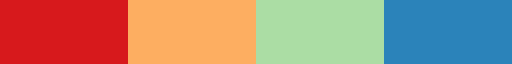

In [77]:
# Create a discrete colormap for plots (not used for correlation matrix)
# Note: in the plotting functions you can either choose a used defined cmap like this one,
# or a normal matplotlib colormap defined by a string (e.g., 'viridis')
colors = np.array([
    [102,194,165],
    [252,141,98],
    [141,160,203],
    [231,138,195]
]) / 255
cell_cmap = sp.create_cmap(color_list = colors)
cell_cmap

### 3.1. Correlation Matrix

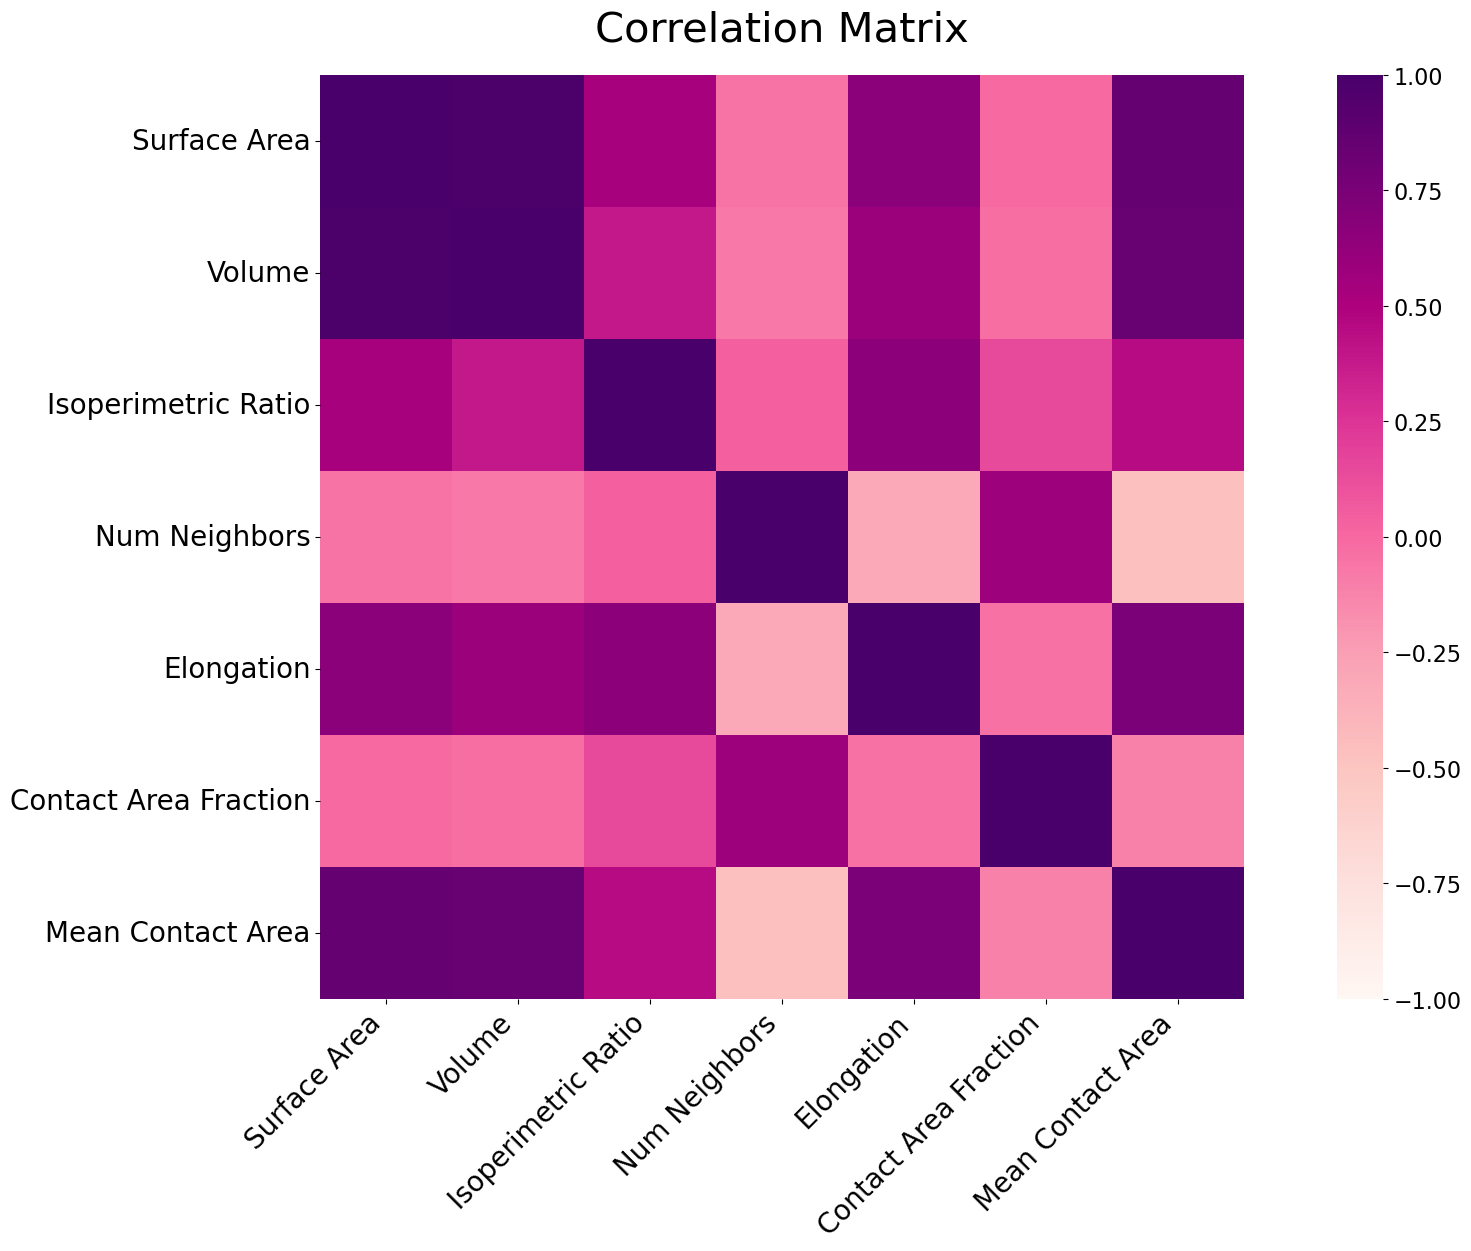

In [170]:
sp.corr_matrix_plot(
    df=std_cell_stats_df,
    numerical_features=numerical_features,
    standardize_data=False,
    remove_outliers=True,
    color_map = 'RdPu',
    save_dir=save_plots_dir,
    show=True
)

### 3.2. PCA plots

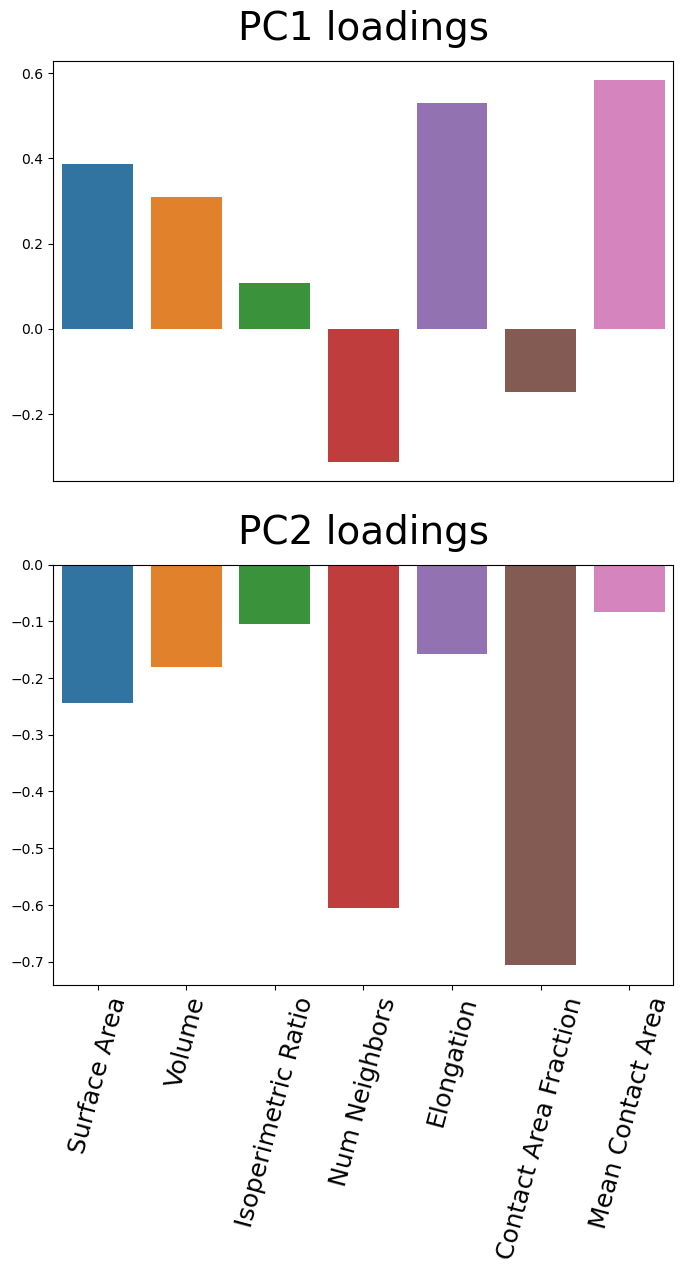

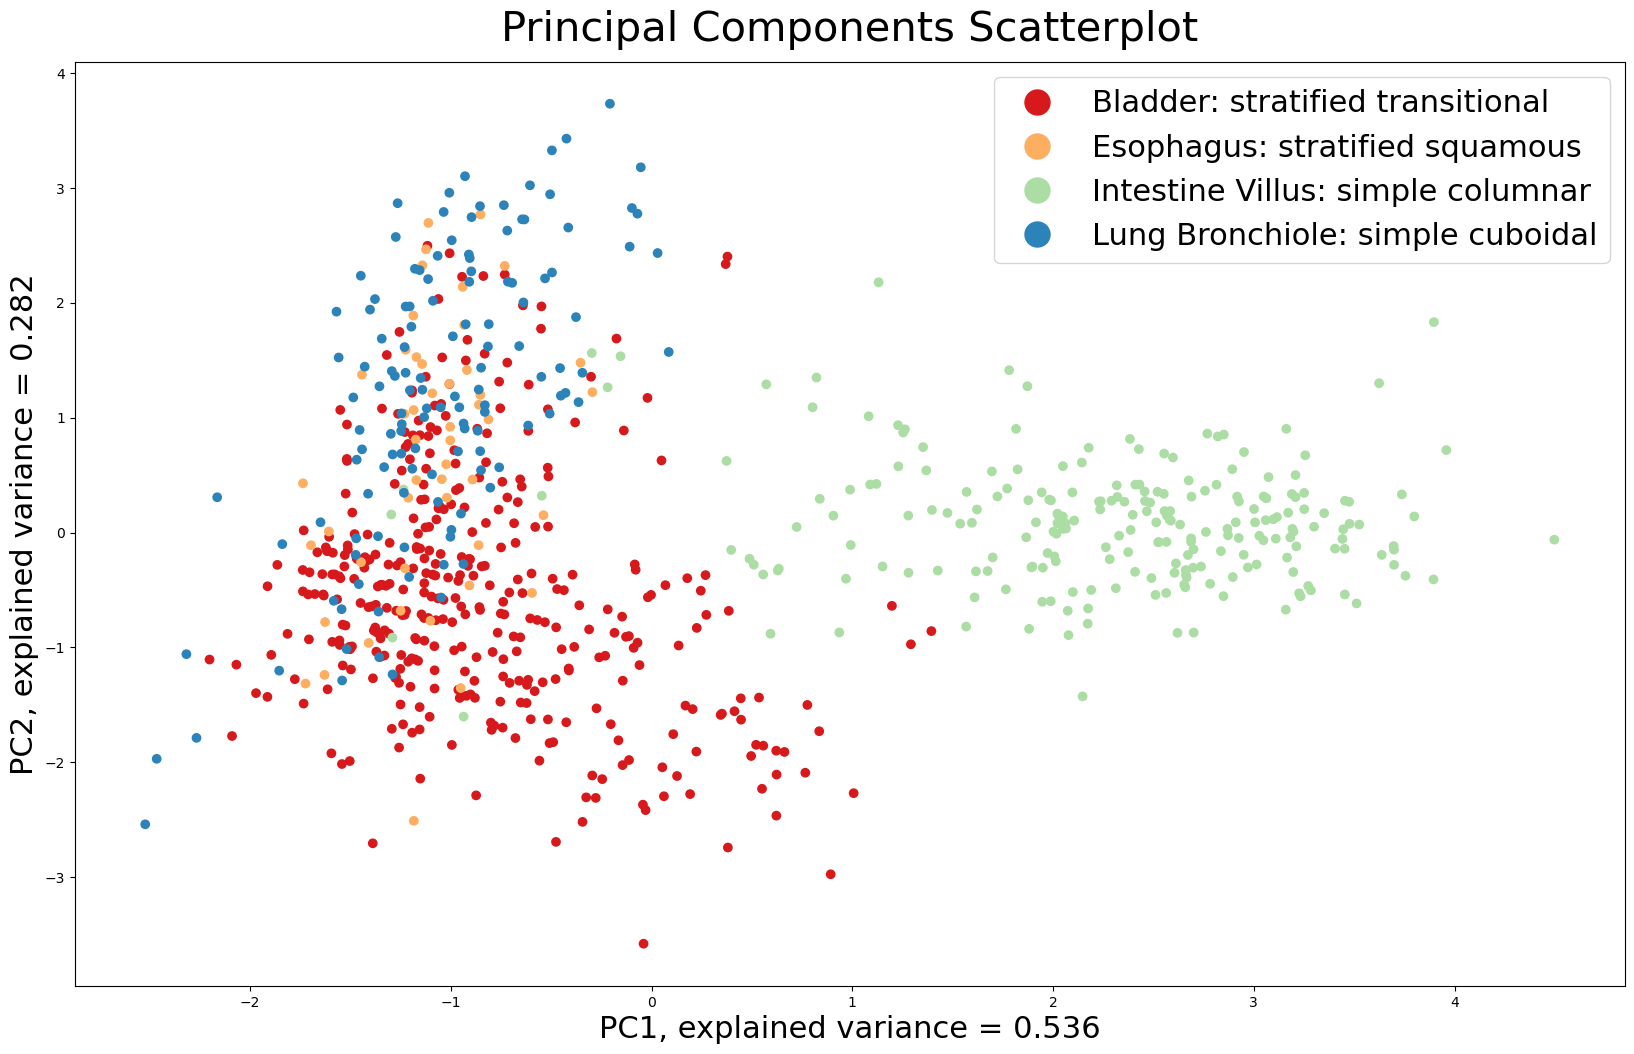

In [171]:
sp.pca_plots(
    df=std_cell_stats_df,
    numerical_features=numerical_features,
    standardize_data=False,
    remove_outliers=True,
    color_map = cell_cmap,
    save_dir=save_plots_dir,
    show=True
)

### 3.3. Grid of kdplots for different numerical features

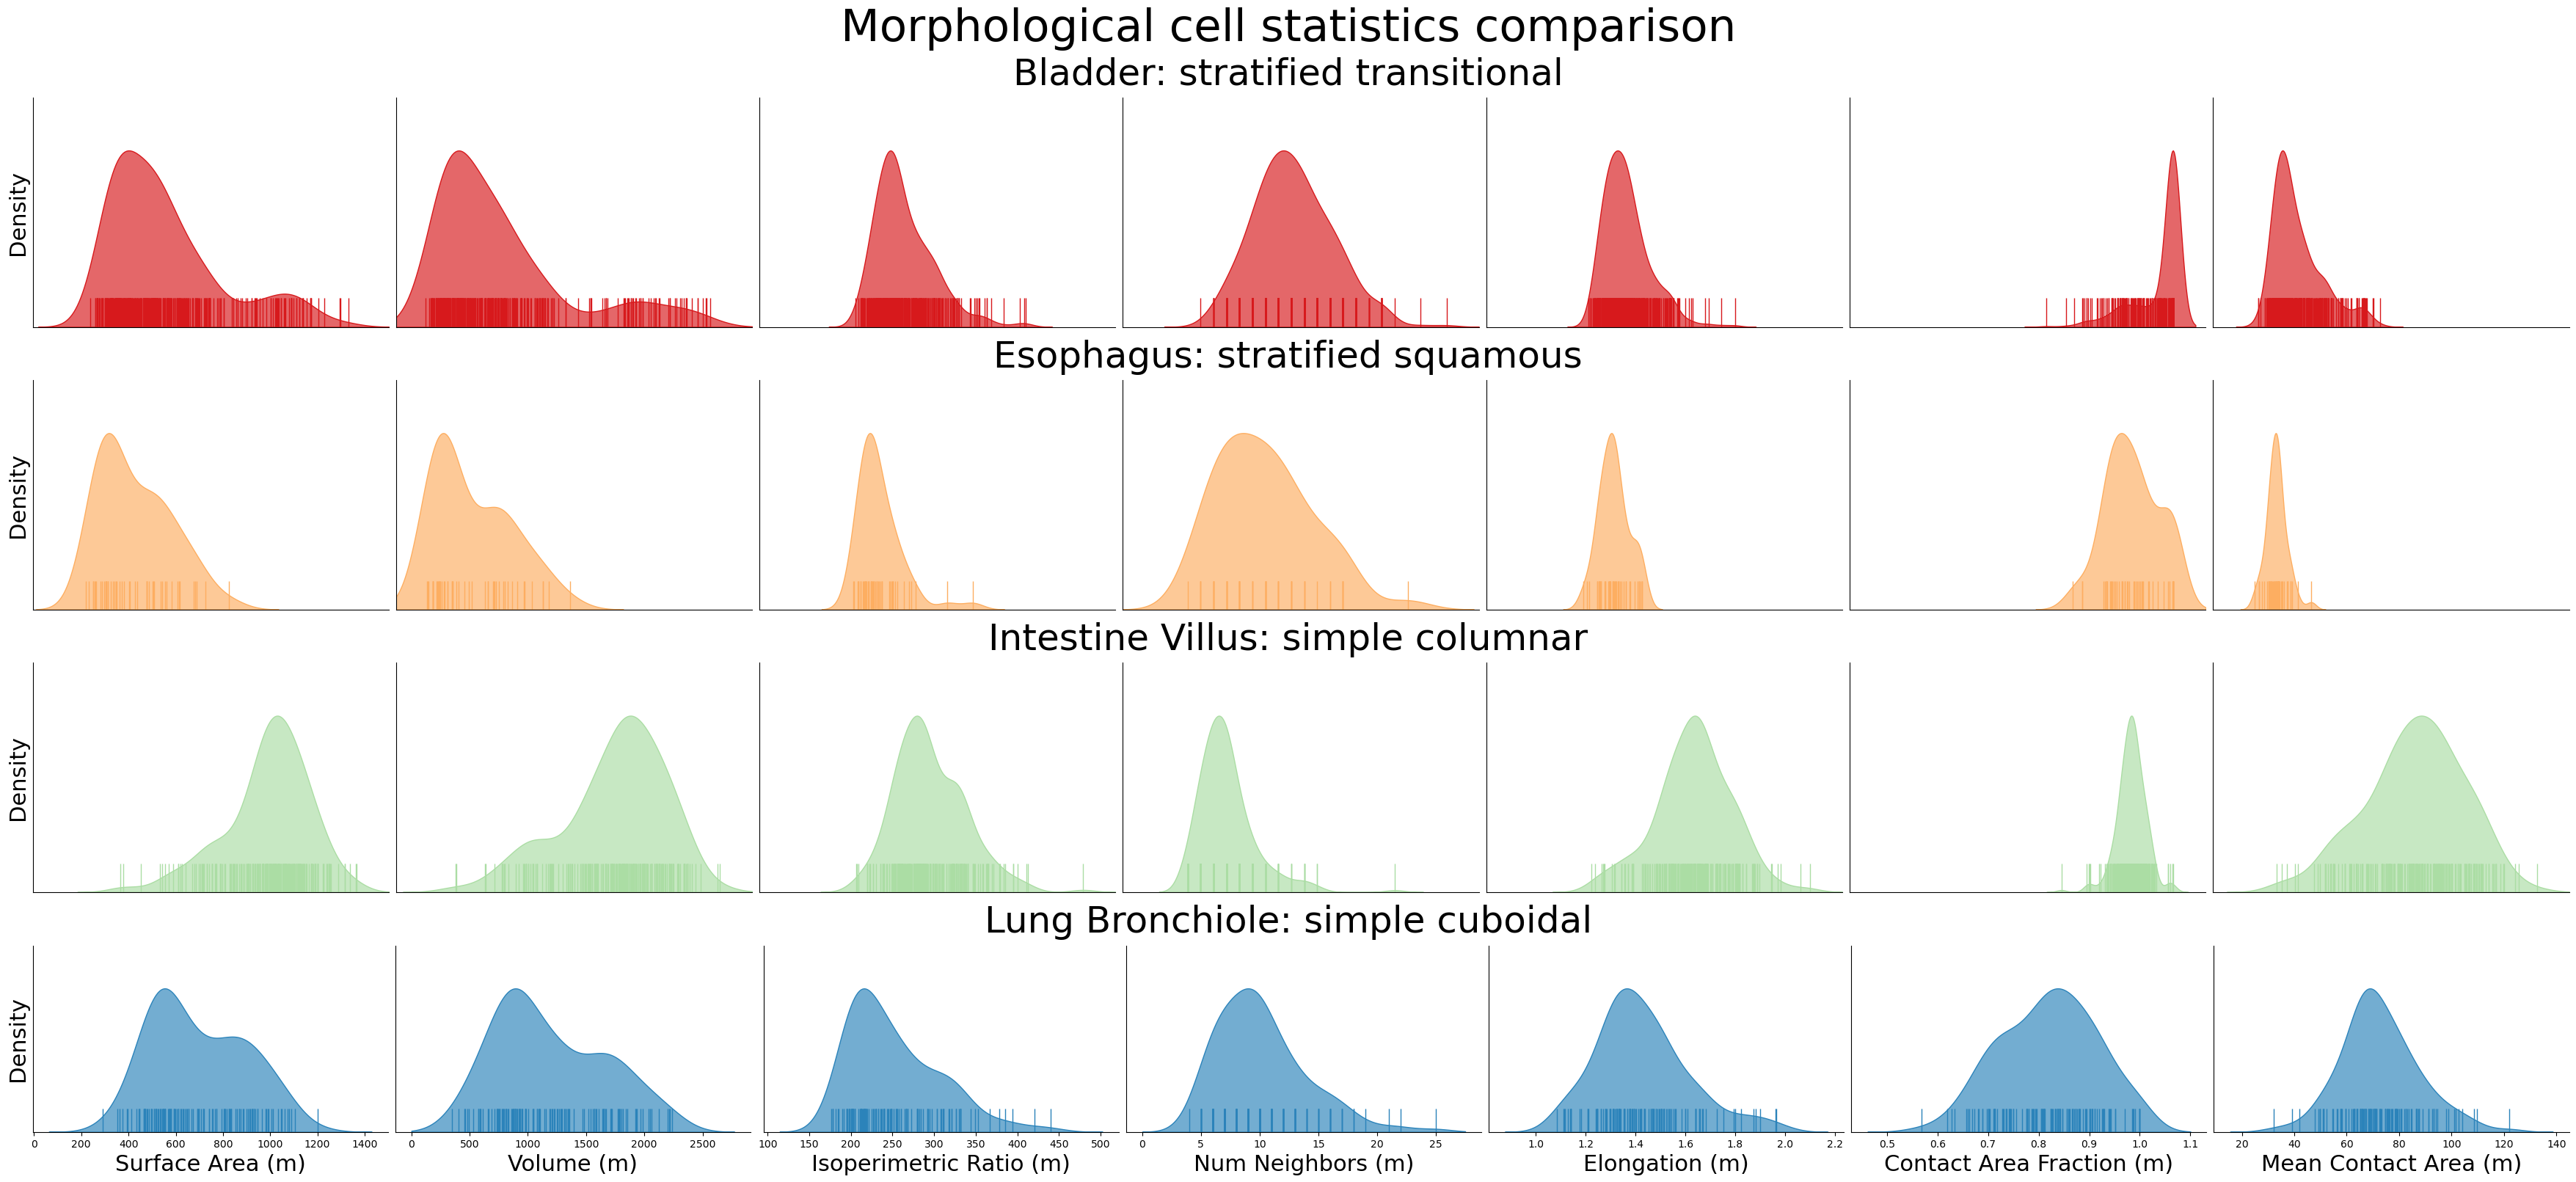

In [172]:
sp.features_grid_kdplots(
    df=numeric_cell_stats_df,
    features=numerical_features,
    remove_outliers=True,
    units_of_measure=['m']*len(numerical_features),
    color_map=cell_cmap,
    save_dir=save_plots_dir,
    show=True
)

### 3.4. Number of neighbors barplots

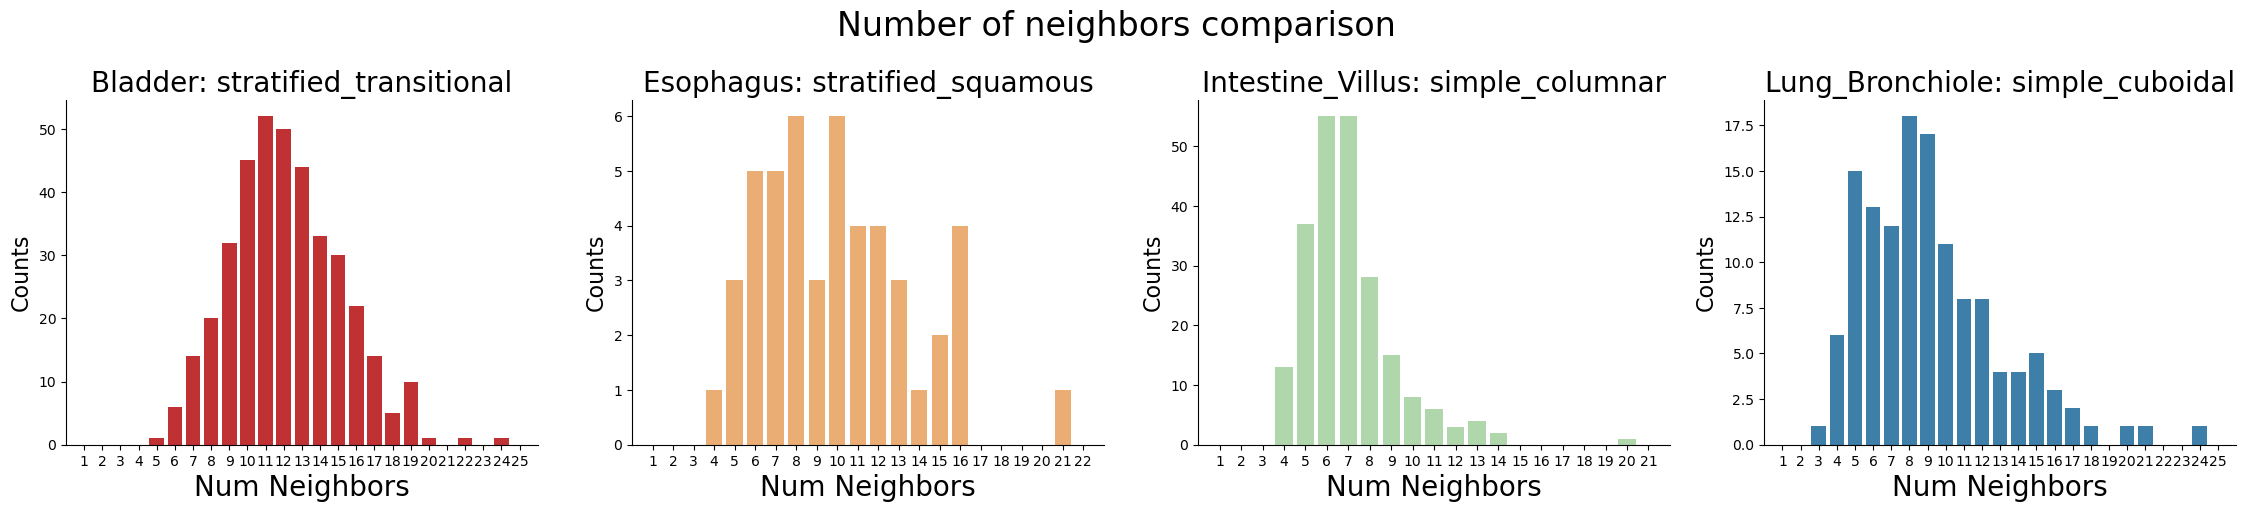

In [173]:
sp.num_neighbors_barplots(
    df=numeric_cell_stats_df,
    remove_outliers=True,
    color_map=cell_cmap,
    save_dir=save_plots_dir,
    show=True
)

### 3.5. Lewis' Law plots

Lewis' law states that the average apical area of cells having $n$ neighbors $\bar{A}_n$ is linearly related to the number of neighbors $n$ itself. $\newline$
In particular we have the following relation:
$$ \frac{\bar{A}_n}{\bar{A}} = \frac{n - 2}{4} $$
In 3D we could have a similar relation for volumes, namely:
$$ \frac{\bar{V}_n}{\bar{V}} \sim n $$


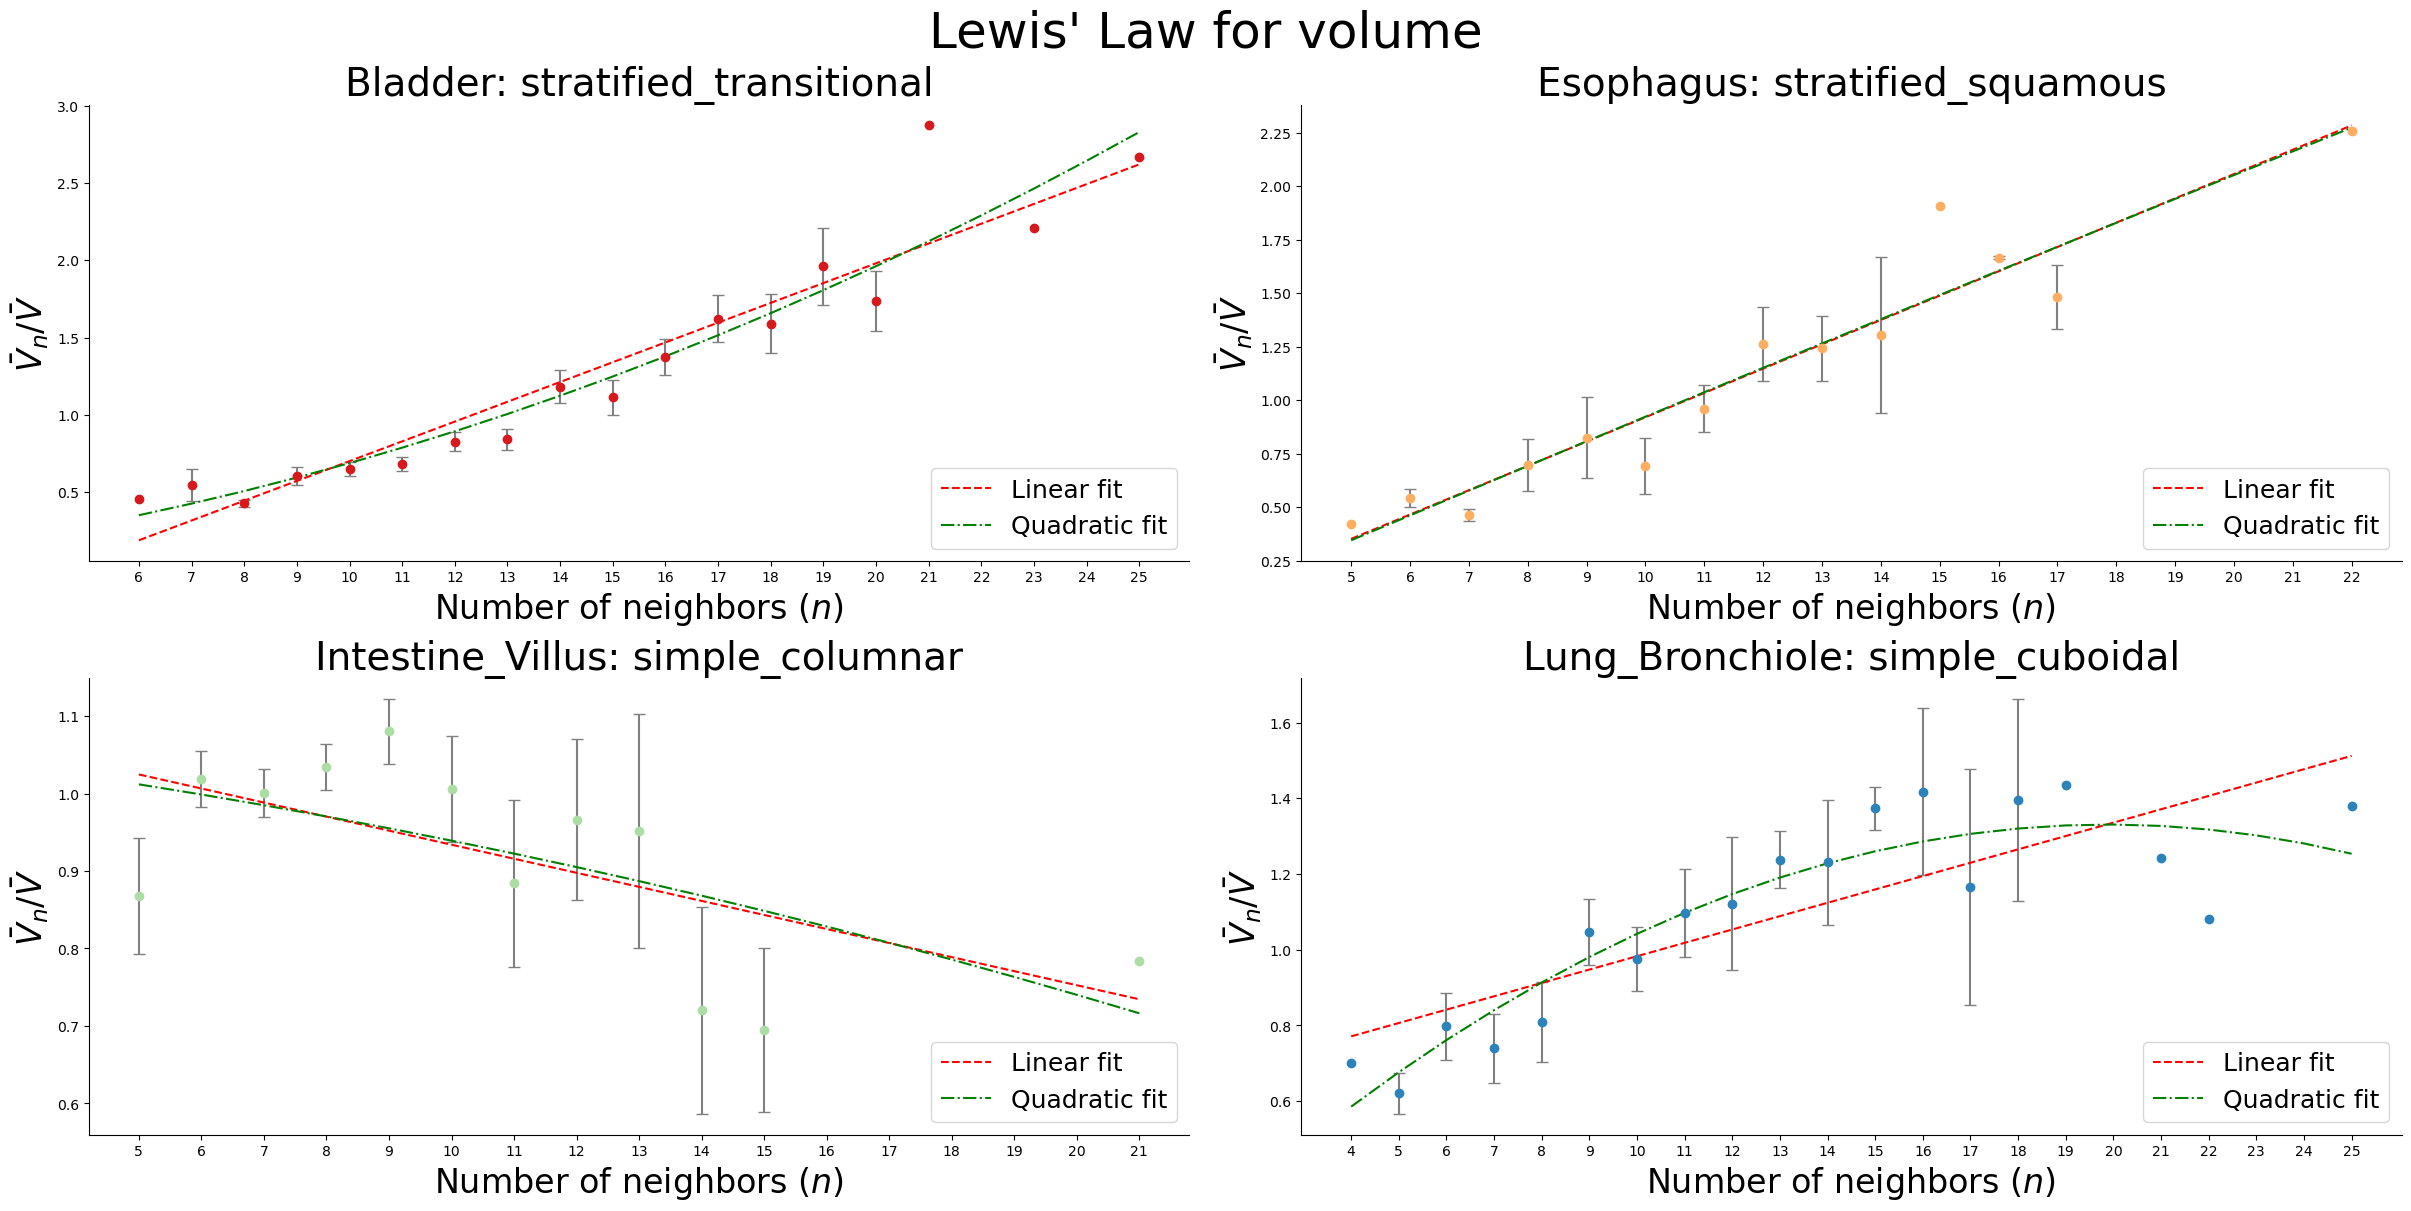

In [174]:
sp.lewis_law_plots(
    df=numeric_cell_stats_df,
    feature='volume',
    fit_degrees=[1,2],
    remove_outliers=True,
    color_map=cell_cmap,
    save_dir=save_plots_dir,
    show=True
)